In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [6]:
# Load and clean the data
df = pd.read_csv("C:/Users/mansi/Downloads/Unemployment in India.csv")

In [7]:
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.dropna()

C:\Users\mansi\AppData\Local\Temp\ipykernel_12772\2683953273.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
# Feature Engineering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Covid_Impact'] = df['Date'].apply(lambda x: 1 if x >= pd.to_datetime("2020-03-01") else 0)

In [9]:
# Encode categorical features
le_region = LabelEncoder()
le_area = LabelEncoder()

df['Region_enc'] = le_region.fit_transform(df['Region'])
df['Area_enc'] = le_area.fit_transform(df['Area'])

In [10]:
# Feature set and target
features = ['Region_enc', 'Area_enc', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Year', 'Month', 'Covid_Impact']
target = 'Estimated Unemployment Rate (%)'

X = df[features]
y = df[target]

In [11]:
# Time-based split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [12]:
# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [15]:
print("📊 Model Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

📊 Model Evaluation Metrics:
R² Score: 0.4237
Mean Squared Error (MSE): 82.9819
Mean Absolute Error (MAE): 6.3618


C:\Users\mansi\AppData\Local\Temp\ipykernel_12772\1564891840.py:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mansi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


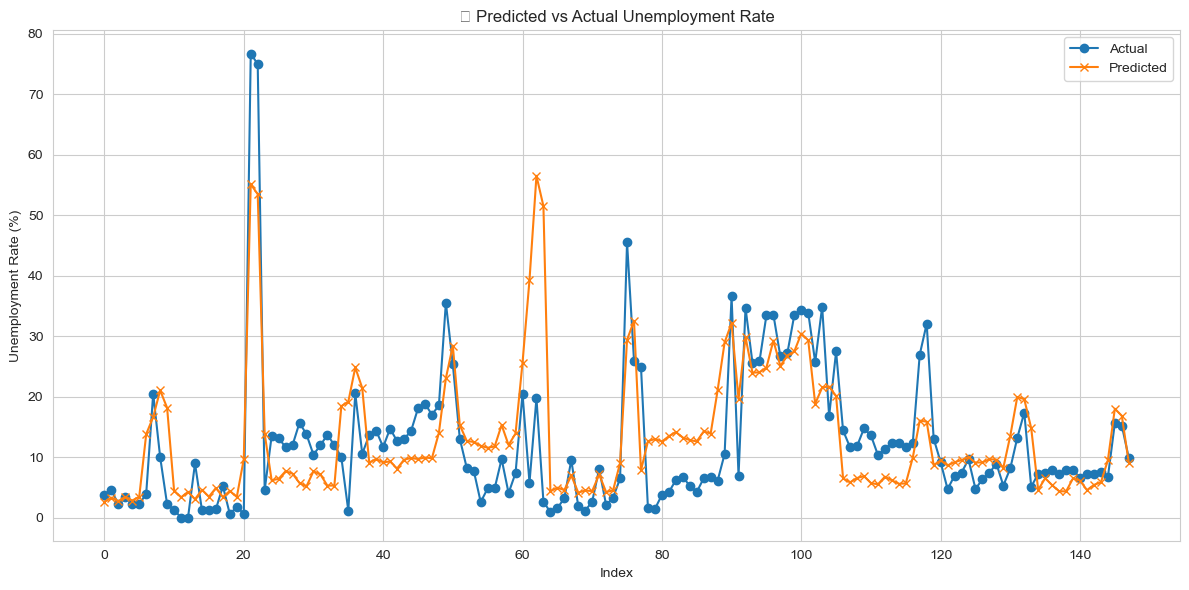

In [16]:
# Plot predicted vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("🔍 Predicted vs Actual Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\mansi\AppData\Local\Temp\ipykernel_12772\3873627740.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\mansi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


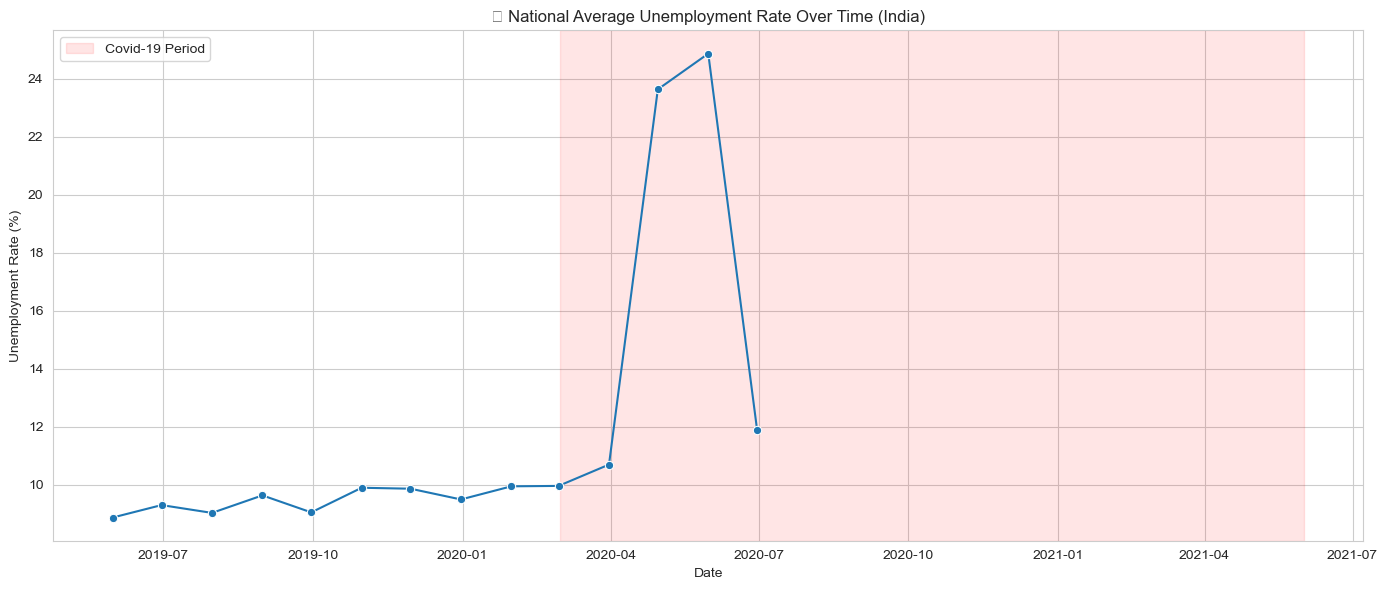

In [17]:
# National Average Unemployment Rate Over Time (India)
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.lineplot(data=national_trend, x="Date", y="Estimated Unemployment Rate (%)", marker='o')
plt.title("📈 National Average Unemployment Rate Over Time (India)")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.axvspan(pd.to_datetime("2020-03-01"), pd.to_datetime("2021-06-01"), color='red', alpha=0.1, label="Covid-19 Period")
plt.legend()
plt.tight_layout()
plt.show()